In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/multi_modal_genre_classifier/

/content/drive/MyDrive/multi_modal_genre_classifier


### Importing and reading the dataset into a dataframe

In [ ]:
import pandas as pd
df_metadata = pd.read_parquet('4mula_small.parquet')
df_metadata.head()

music_id                 music_name music_lang  \
0  3ade68b6gc207fda3  I've Got To See You Again         en   
1  3ade68b8g9410afa3            New Perspective         en   
2  3ade68b7gb67d7ea3                   Renúncia      pt-br   
3  3ade68b8gcd12d0b3                  Good Form         en   
4  3ade68b7g955b3ea3                Out Of Time         en   

                                        music_lyrics             art_id  \
0  Line on your face don't bother me\nDown in my ...  3ade68b6gfd79eda3   
1  I feel the salty waves come in\nI feel them cr...  3ade68b6g2480fda3   
2  Hoje não existe nada mais entre nós\nSomos dua...  3ade68b5gef48eda3   
3  Eardrummers\nUh, uh, huh, uh, huh\nUh, yo, hol...  3ade68b7gc2b61ea3   
4  You don't know what's going on\nYou've been aw...  3ade68b6g28c9eda3   

              art_name art_rank        main_genre  \
0          Norah Jones      353              Jazz   
1  Panic! At The Disco      154  Alternative Rock   
2     Nelson Gonçalves      446               MPB   
3          Nicki Minaj      421               Rap   
4       Rolling Stones      118      Classic Rock   

                                       related_genre  \
0  ['Jazz', 'Blues', 'Soul Music', 'Country', 'Ro...   
1  ['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...   
2  ['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...   
3  ['Rap', 'Pop', 'Hip Hop', 'R&B', 'Dance', 'Ele...   
4  ['Classic Rock', 'Rock', 'Blues', 'R&B', 'Hard...   

                                         related_art  \
0  [{'id': '3ade68b6g9a3beda3', 'name': 'Joss Sto...   
1  [{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...   
2  [{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...   
3  [{'id': '3ade68b5g8d18eda3', 'name': 'Lil Wayn...   
4  [{'id': '3ade68b6g7d5aeda3', 'name': 'Mick Jag...   

                                       related_music  \
0  [{'id': '3ade68b7gdddfcea3', 'name': 'Ten Phan...   
1  [{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...   
2  [{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...   
3                                                 []   
4  [{'id': '3ade68b7g9ae20ea3', 'name': 'Run Of T...   

                        musicnn_tags  \
0           ['piano','drums','slow']   
1            ['rock','pop','guitar']   
2  ['male','classical','male vocal']   
3     ['techno','electronic','beat']   
4         ['guitar','vocal','drums']   

                                      melspectrogram  
0  [[136.96524, 135.869965, 118.730804, 133.62802...  
1  [[6.28145981, 1.50680351, 0.260610491, 0.17753...  
2  [[0.905277014, 0.33714968, 0.210445538, 0.1545...  
3  [[2.005826, 0.721350968, 0.2188458, 0.23778049...  
4  [[0.200993568, 0.232473925, 0.227112547, 0.139...

In [ ]:
import librosa
import librosa.display

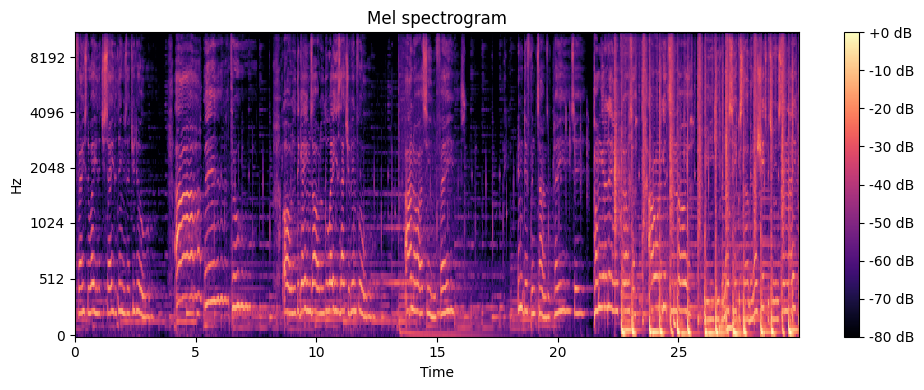

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(t, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

#### Performing basic EDA to retrieve songs from the top 2 languages and top 10 genres

In [ ]:
df_metadata.value_counts('music_lang')

music_lang
en       4723
pt-br    4655
es        246
pt         37
dtype: int64

In [ ]:
df = df_metadata.loc[df_metadata['music_lang'].isin(['en','pt-br'])]
df.head()

music_id                 music_name music_lang  \
0  3ade68b6gc207fda3  I've Got To See You Again         en   
1  3ade68b8g9410afa3            New Perspective         en   
2  3ade68b7gb67d7ea3                   Renúncia      pt-br   
3  3ade68b8gcd12d0b3                  Good Form         en   
4  3ade68b7g955b3ea3                Out Of Time         en   

                                        music_lyrics             art_id  \
0  Line on your face don't bother me\nDown in my ...  3ade68b6gfd79eda3   
1  I feel the salty waves come in\nI feel them cr...  3ade68b6g2480fda3   
2  Hoje não existe nada mais entre nós\nSomos dua...  3ade68b5gef48eda3   
3  Eardrummers\nUh, uh, huh, uh, huh\nUh, yo, hol...  3ade68b7gc2b61ea3   
4  You don't know what's going on\nYou've been aw...  3ade68b6g28c9eda3   

              art_name art_rank        main_genre  \
0          Norah Jones      353              Jazz   
1  Panic! At The Disco      154  Alternative Rock   
2     Nelson Gonçalves      446               MPB   
3          Nicki Minaj      421               Rap   
4       Rolling Stones      118      Classic Rock   

                                       related_genre  \
0  ['Jazz', 'Blues', 'Soul Music', 'Country', 'Ro...   
1  ['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...   
2  ['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...   
3  ['Rap', 'Pop', 'Hip Hop', 'R&B', 'Dance', 'Ele...   
4  ['Classic Rock', 'Rock', 'Blues', 'R&B', 'Hard...   

                                         related_art  \
0  [{'id': '3ade68b6g9a3beda3', 'name': 'Joss Sto...   
1  [{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...   
2  [{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...   
3  [{'id': '3ade68b5g8d18eda3', 'name': 'Lil Wayn...   
4  [{'id': '3ade68b6g7d5aeda3', 'name': 'Mick Jag...   

                                       related_music  \
0  [{'id': '3ade68b7gdddfcea3', 'name': 'Ten Phan...   
1  [{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...   
2  [{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...   
3                                                 []   
4  [{'id': '3ade68b7g9ae20ea3', 'name': 'Run Of T...   

                        musicnn_tags  \
0           ['piano','drums','slow']   
1            ['rock','pop','guitar']   
2  ['male','classical','male vocal']   
3     ['techno','electronic','beat']   
4         ['guitar','vocal','drums']   

                                      melspectrogram  
0  [[136.96524, 135.869965, 118.730804, 133.62802...  
1  [[6.28145981, 1.50680351, 0.260610491, 0.17753...  
2  [[0.905277014, 0.33714968, 0.210445538, 0.1545...  
3  [[2.005826, 0.721350968, 0.2188458, 0.23778049...  
4  [[0.200993568, 0.232473925, 0.227112547, 0.139...

In [ ]:
df.value_counts('main_genre')

main_genre
Gospel/Religious    1165
Pop                  912
Romantic             905
Rock                 608
Sertanejo            576
Pop/Rock             490
MPB                  471
Alternative Rock     405
Hip Hop              327
Dance                312
Rap                  271
Indie                251
Samba                236
Soundtrack           227
R&B                  169
Kids                 150
Pagode               130
Hard Rock            124
Soul Music           123
Soft Rock            119
Electronic           116
Forró                114
Reggae               109
Folk                 101
Unknown               85
Surf Music            75
Black Music           73
Jazz                  73
Axé                   68
House                 47
Samba Enredo          44
Gothic                42
Funk Carioca          42
Punk Rock             40
Bossa Nova            40
Grunge                39
Piano Rock            36
Heavy Metal           36
New Wave              36
Progressive   

In [ ]:
df = df.loc[df['main_genre'].isin(['Romantic','Pop','Indie','Gospel/Religious','Hip Hop','Sertanejo','Rock','Pop/Rock','MPB','Alternative Rock'])]
df.head()

music_id               music_name music_lang  \
1   3ade68b8g9410afa3          New Perspective         en   
2   3ade68b7gb67d7ea3                 Renúncia      pt-br   
13  3ade68b7gf0375ea3           Na Sua Estante      pt-br   
18  3ade68b8ge96310b3                  I Lived         en   
24  3ade68b6gf35eeda3  De do Do do de da Da Da         en   

                                         music_lyrics             art_id  \
1   I feel the salty waves come in\nI feel them cr...  3ade68b6g2480fda3   
2   Hoje não existe nada mais entre nós\nSomos dua...  3ade68b5gef48eda3   
13  Te vejo errando e isso não é pecado\nExceto qu...  3ade68b6gd91aeda3   
18  Hope when you take that jump\nYou don't feel t...  3ade68b6g3ae7fda3   
24  Don't think me unkind\nWords are hard to find\...  3ade68b5gb877eda3   

               art_name art_rank        main_genre  \
1   Panic! At The Disco      154  Alternative Rock   
2      Nelson Gonçalves      446               MPB   
13                Pitty      223  Alternative Rock   
18          OneRepublic      241  Alternative Rock   
24           The Police      230              Rock   

                                        related_genre  \
1   ['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...   
2   ['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...   
13  ['Rock Alternativo', 'Rock', 'Pop/Rock', 'Punk...   
18  ['Rock Alternativo', 'Pop/Rock', 'Rock', 'Pop'...   
24  ['Rock', 'New Wave', 'Punk Rock', 'Pop/Rock', ...   

                                          related_art  \
1   [{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...   
2   [{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...   
13  [{'id': '3ade68b6g309aeda3', 'name': 'Inkoma'}...   
18  [{'id': '3ade68b5gf408eda3', 'name': 'Timbalan...   
24  [{'id': '3ade68b7gf4242ea3', 'name': 'Andy Sum...   

                                        related_music  \
1   [{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...   
2   [{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...   
13  [{'id': '3ade68b5g7158eda3', 'name': 'Primeiro...   
18                                                 []   
24  [{'id': '3ade68b5g5887eda3', 'name': 'You Shou...   

                         musicnn_tags  \
1             ['rock','pop','guitar']   
2   ['male','classical','male vocal']   
13           ['rock','guitar','male']   
18        ['male','man','male vocal']   
24          ['drums','guitar','rock']   

                                       melspectrogram  
1   [[6.28145981, 1.50680351, 0.260610491, 0.17753...  
2   [[0.905277014, 0.33714968, 0.210445538, 0.1545...  
13  [[24.5147076, 19.3911915, 12.9581242, 7.063698...  
18  [[8.93155811e-05, 0.000112133188, 8.39726417e-...  
24  [[23.2699013, 18.8213215, 15.2065153, 3.923572...

In [ ]:
df = df.reset_index(drop=True)

#### Reshaping the spectrogram for the custom data loader that we will create below

In [ ]:
import numpy as np
spectrograms = []
for i in range(len(df)):
  spectrograms.append(np.stack(df['melspectrogram'][i]))

spectrograms[0]

array([[6.28145981e+00, 1.50680351e+00, 2.60610491e-01, 1.77533090e-01,
        2.09476173e-01, 1.15704560e+00, 1.83942318e+00, 5.70547462e-01,
        2.00523362e-01, 4.35307503e-01, 2.41928756e-01, 1.68078080e-01,
        3.00665617e-01, 2.32483089e-01, 4.61424410e-01, 1.58964038e-01,
        2.83000350e-01, 6.07134342e-01, 1.87133402e-01, 3.83041501e-02,
        8.10049847e-02, 2.39758804e-01, 5.63029230e-01, 4.39628720e-01,
        1.43171042e-01, 1.33085176e-01, 7.70903975e-02, 1.28190160e-01,
        1.83897406e-01, 1.22201413e-01, 1.19548686e-01, 5.53910065e+00,
        2.52040176e+01, 8.96249847e+01, 1.12310669e+02, 4.21860161e+01,
        1.61134033e+01, 7.54528999e+00, 2.92969871e+00, 4.26283956e-01,
        3.10733259e-01, 3.35054815e-01, 2.39458710e-01, 3.19253892e-01,
        8.82622898e-02, 9.36933458e-02, 2.76887834e-01, 8.47866058e+00,
        3.73365974e+01, 1.59206146e+02, 1.53506134e+02, 6.65741119e+01,
        2.57801208e+01, 8.81729889e+00, 2.07948899e+00, 6.349792

### Plotting a t-SNE plot for a sample of the data (25 songs from 5 genres)

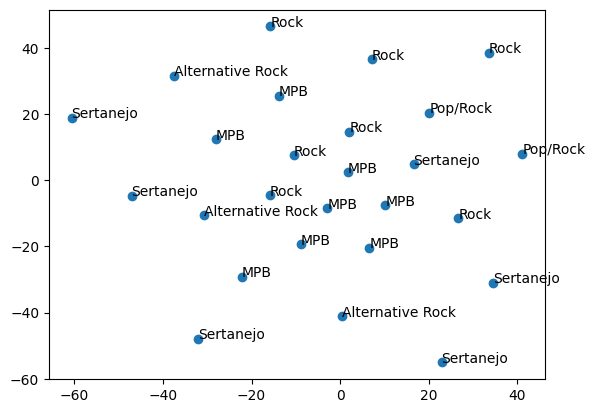

In [ ]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
for i, txt in enumerate(genres):
    plt.annotate(txt, (tsne_data[i, 0], tsne_data[i, 1]))
plt.show()

#### Reshaping the spectrograms

In [ ]:
df['new_spectrograms'] = spectrograms
df.head()

music_id       music_name music_lang  \
0  3ade68b8g9410afa3  New Perspective         en   
1  3ade68b7gb67d7ea3         Renúncia      pt-br   
2  3ade68b8gb59f30b3       Turn It Up         en   
3  3ade68b7g90c35ea3    Humano Demais      pt-br   
4  3ade68b7gcbb57ea3      Te Agradeço      pt-br   

                                        music_lyrics             art_id  \
0  I feel the salty waves come in\nI feel them cr...  3ade68b6g2480fda3   
1  Hoje não existe nada mais entre nós\nSomos dua...  3ade68b5gef48eda3   
2  But don't be alarmed\nWhen the lights come on\...  3ade68b6g415aeda3   
3  Humano Demais – por Everton Maliska \n\nEu fic...  3ade68b6g7449eda3   
4  Por tudo o que Tens feito\nPor tudo o que Vais...  3ade68b6gcb44fda3   

              art_name art_rank        main_genre  \
0  Panic! At The Disco      154  Alternative Rock   
1     Nelson Gonçalves      446               MPB   
2            Sean Paul      321           Hip Hop   
3  Padre Fábio de Melo      169  Gospel/Religious   
4     Ministério Jovem      414  Gospel/Religious   

                                       related_genre  \
0  ['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...   
1  ['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...   
2  ['Hip Hop', 'Reggae', 'Rap', 'Black Music', 'D...   
3  ['Gospel/Religioso', 'Romântico', 'Trilha Sono...   
4  ['Gospel/Religioso', 'Instrumental', 'Trilha S...   

                                         related_art  \
0  [{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...   
1  [{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...   
2  [{'id': '3ade68b6g28abeda3', 'name': 'Martin S...   
3  [{'id': '3ade68b6g9abbfda3', 'name': 'Padre Re...   
4  [{'id': '3ade68b7g16350ea3', 'name': 'Ministér...   

                                       related_music  \
0  [{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...   
1  [{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...   
2                                                 []   
3  [{'id': '3ade68b6gc872fda3', 'name': 'Cura-me'...   
4  [{'id': '3ade68b7g4c238ea3', 'name': 'Te Agrad...   

                        musicnn_tags  \
0            ['rock','pop','guitar']   
1  ['male','classical','male vocal']   
2     ['techno','electronic','beat']   
3     ['guitar','male','male vocal']   
4          ['vocal','guitar','slow']   

                                      melspectrogram  \
0  [[6.28145981, 1.50680351, 0.260610491, 0.17753...   
1  [[0.905277014, 0.33714968, 0.210445538, 0.1545...   
2  [[0.00925674196, 0.0272453353, 0.433711052, 4....   
3  [[17.8149872, 9.60394192, 6.78934622, 7.541191...   
4  [[18.2767735, 8.62708855, 5.22486877, 6.486338...   

                                    new_spectrograms  
0  [[6.28145981, 1.50680351, 0.260610491, 0.17753...  
1  [[0.905277014, 0.33714968, 0.210445538, 0.1545...  
2  [[0.00925674196, 0.0272453353, 0.433711052, 4....  
3  [[17.8149872, 9.60394192, 6.78934622, 7.541191...  
4  [[18.2767735, 8.62708855, 5.22486877, 6.486338...

In [ ]:
df = df.drop('melspectrogram',axis=1)
df.head()

music_id       music_name music_lang  \
0  3ade68b8g9410afa3  New Perspective         en   
1  3ade68b7gb67d7ea3         Renúncia      pt-br   
2  3ade68b8gb59f30b3       Turn It Up         en   
3  3ade68b7g90c35ea3    Humano Demais      pt-br   
4  3ade68b7gcbb57ea3      Te Agradeço      pt-br   

                                        music_lyrics             art_id  \
0  I feel the salty waves come in\nI feel them cr...  3ade68b6g2480fda3   
1  Hoje não existe nada mais entre nós\nSomos dua...  3ade68b5gef48eda3   
2  But don't be alarmed\nWhen the lights come on\...  3ade68b6g415aeda3   
3  Humano Demais – por Everton Maliska \n\nEu fic...  3ade68b6g7449eda3   
4  Por tudo o que Tens feito\nPor tudo o que Vais...  3ade68b6gcb44fda3   

              art_name art_rank        main_genre  \
0  Panic! At The Disco      154  Alternative Rock   
1     Nelson Gonçalves      446               MPB   
2            Sean Paul      321           Hip Hop   
3  Padre Fábio de Melo      169  Gospel/Religious   
4     Ministério Jovem      414  Gospel/Religious   

                                       related_genre  \
0  ['Rock Alternativo', 'Pop/Punk', 'Pop/Rock', '...   
1  ['MPB', 'Velha Guarda', 'Romântico', 'Samba', ...   
2  ['Hip Hop', 'Reggae', 'Rap', 'Black Music', 'D...   
3  ['Gospel/Religioso', 'Romântico', 'Trilha Sono...   
4  ['Gospel/Religioso', 'Instrumental', 'Trilha S...   

                                         related_art  \
0  [{'id': '3ade68b6gc5baeda3', 'name': 'Fall Out...   
1  [{'id': '3ade68b5gf058eda3', 'name': 'Orlando ...   
2  [{'id': '3ade68b6g28abeda3', 'name': 'Martin S...   
3  [{'id': '3ade68b6g9abbfda3', 'name': 'Padre Re...   
4  [{'id': '3ade68b7g16350ea3', 'name': 'Ministér...   

                                       related_music  \
0  [{'id': '3ade68b7gc6144ea3', 'name': 'Wake Me ...   
1  [{'id': '3ade68b6gbab1fda3', 'name': 'As Rosas...   
2                                                 []   
3  [{'id': '3ade68b6gc872fda3', 'name': 'Cura-me'...   
4  [{'id': '3ade68b7g4c238ea3', 'name': 'Te Agrad...   

                        musicnn_tags  \
0            ['rock','pop','guitar']   
1  ['male','classical','male vocal']   
2     ['techno','electronic','beat']   
3     ['guitar','male','male vocal']   
4          ['vocal','guitar','slow']   

                                    new_spectrograms  
0  [[6.28145981, 1.50680351, 0.260610491, 0.17753...  
1  [[0.905277014, 0.33714968, 0.210445538, 0.1545...  
2  [[0.00925674196, 0.0272453353, 0.433711052, 4....  
3  [[17.8149872, 9.60394192, 6.78934622, 7.541191...  
4  [[18.2767735, 8.62708855, 5.22486877, 6.486338...

In [ ]:
train_df = df[['new_spectrograms','main_genre']]
train_df.head()

new_spectrograms        main_genre
0  [[6.28145981, 1.50680351, 0.260610491, 0.17753...  Alternative Rock
1  [[0.905277014, 0.33714968, 0.210445538, 0.1545...               MPB
2  [[0.00925674196, 0.0272453353, 0.433711052, 4....           Hip Hop
3  [[17.8149872, 9.60394192, 6.78934622, 7.541191...  Gospel/Religious
4  [[18.2767735, 8.62708855, 5.22486877, 6.486338...  Gospel/Religious

In [ ]:
train_df = pd.get_dummies(train_df, columns=['main_genre'])
train_df.head()

new_spectrograms  \
0  [[6.28145981, 1.50680351, 0.260610491, 0.17753...   
1  [[0.905277014, 0.33714968, 0.210445538, 0.1545...   
2  [[0.00925674196, 0.0272453353, 0.433711052, 4....   
3  [[17.8149872, 9.60394192, 6.78934622, 7.541191...   
4  [[18.2767735, 8.62708855, 5.22486877, 6.486338...   

   main_genre_Alternative Rock  main_genre_Gospel/Religious  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   main_genre_Hip Hop  main_genre_Indie  main_genre_MPB  main_genre_Pop  \
0                   0                 0               0               0   
1                   0                 0               1               0   
2                   1                 0               0               0   
3                   0                 0               0               0   
4                   0                 0               0               0   

   main_genre_Pop/Rock  main_genre_Rock  main_genre_Romantic  \
0                    0                0                    0   
1                    0                0                    0   
2                    0                0                    0   
3                    0                0                    0   
4                    0                0                    0   

   main_genre_Sertanejo  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
train_df_copy = train_df.copy()

for i in range(len(train_df_copy)):
  if train_df_copy['new_spectrograms'][i].shape[1] < 1292:
    train_df_copy = train_df_copy.drop(index=i)

train_df_copy.head()

new_spectrograms  \
0  [[6.28145981, 1.50680351, 0.260610491, 0.17753...   
1  [[0.905277014, 0.33714968, 0.210445538, 0.1545...   
2  [[0.00925674196, 0.0272453353, 0.433711052, 4....   
3  [[17.8149872, 9.60394192, 6.78934622, 7.541191...   
4  [[18.2767735, 8.62708855, 5.22486877, 6.486338...   

   main_genre_Alternative Rock  main_genre_Gospel/Religious  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   main_genre_Hip Hop  main_genre_Indie  main_genre_MPB  main_genre_Pop  \
0                   0                 0               0               0   
1                   0                 0               1               0   
2                   1                 0               0               0   
3                   0                 0               0               0   
4                   0                 0               0               0   

   main_genre_Pop/Rock  main_genre_Rock  main_genre_Romantic  \
0                    0                0                    0   
1                    0                0                    0   
2                    0                0                    0   
3                    0                0                    0   
4                    0                0                    0   

   main_genre_Sertanejo  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
train_df.columns

Index(['new_spectrograms', 'main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo'],
      dtype='object')

### Creating a custom dataloader to return the spectrogram and the class label

In [ ]:
class CustomImageTextDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seed = 42
        torch.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        self.data = self.data.reset_index(drop=True)
        spectrograms = self.data['new_spectrograms'][idx]
        #spectrograms = torch.from_numpy(np.array([x.reshape( (1, 128, 1292) ) for x in spectrograms]))
        spectrograms = torch.tensor(spectrograms, dtype=torch.float32)
        #print(spectrograms.size())
        spectrograms = spectrograms.reshape(1, 128, 1292)
        labels = torch.tensor(self.data[['main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo']].iloc[idx],dtype=torch.float32)
        return spectrograms, labels

train_data = train_df_copy.sample(frac=0.80, random_state=42)
test_data = train_df_copy.sample(frac=0.20, random_state=42)
val_data = test_data.sample(frac=0.50, random_state=42)


traindata = CustomImageTextDataset(
    csv_file=train_data,
)


testdata = CustomImageTextDataset(
    csv_file=test_data,
)

# Create a data loader with 32 data points as the batch size
batch_size = 32
train_loader = DataLoader(traindata, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testdata, batch_size=batch_size, shuffle=True)

### Designing a CNN model to classify genre based on spectrogram

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import numpy as np
from numpy import argmax
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import torch.nn.functional as F


class CNN(nn.Module):

    def __init__(self, num_classes):
        super(CNN, self).__init__()

        self.avgpool = nn.AvgPool2d(2, stride=2)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=24, kernel_size=5, stride =1 )
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=5, stride =1, padding = 'same' )
        self.conv3 = nn.Conv2d(in_channels=48, out_channels=48, kernel_size=5, stride =1, padding = 'same' )


        self.dropout1 = nn.Dropout(0.2)
        self.linear1 = nn.Linear(115920, 64)
        self.dropout2 = nn.Dropout(0.2)

        self.linear2 = nn.Linear(64, num_classes)

    def forward(self, x):

        out = nn.functional.relu(self.avgpool(self.conv1(x)))
        out = nn.functional.relu(self.avgpool(self.conv2(out)))
        out = nn.functional.relu(self.avgpool(self.conv3(out)))
        out = torch.flatten(out, start_dim = 1)


        out = self.dropout1(out)

        out = nn.functional.relu(self.linear1(out))
        out = self.dropout2(out)

        out = self.linear2(out)
        #out = F.softmax(out, dim=1)

        return out

### Training the model for 150 epochs with a learning rate of 0.0001

In [ ]:
model = CNN(num_classes = 10)
model = model.float()

# Transfer Model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()

summary(model, (1, 128, 1292))

batch_size = 32
epochs = 150
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

for epoch in range(epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:

            # Transfer Data to GPU if available
            if torch.cuda.is_available():
                inputs, targets = inputs.cuda(), targets.cuda()

            optimizer.zero_grad()
            #print(inputs.size())
            outputs = model(inputs)
            # calculate loss
            loss = criterion(outputs, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

            train_loss += loss.item()

    ############## validation loop
    model.eval()
    valid_loss = 0.0
    for inputs, targets in val_loader:

      if torch.cuda.is_available():
          inputs, targets = inputs.cuda(), targets.cuda()

      outputs = model(inputs)
      loss = criterion(outputs,targets)
      valid_loss += loss.item()


    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')

    # if min_valid_loss > valid_loss:
    #     print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
    #     min_valid_loss = valid_loss

    #     # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/multi_modal_genre_classifier/saved_model_10_genres_150ep.pth')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 24, 124, 1288]             624
         AvgPool2d-2          [-1, 24, 62, 644]               0
            Conv2d-3          [-1, 48, 62, 644]          28,848
         AvgPool2d-4          [-1, 48, 31, 322]               0
            Conv2d-5          [-1, 48, 31, 322]          57,648
         AvgPool2d-6          [-1, 48, 15, 161]               0
           Dropout-7               [-1, 115920]               0
            Linear-8                   [-1, 64]       7,418,944
           Dropout-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 7,506,714
Trainable params: 7,506,714
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.63
Forward/backward pass size (MB): 60.26
Params size (MB): 28.64
Estim

### Evaluating and testing the model using the saved weights

In [ ]:
genres = ['main_genre_Alternative Rock',
       'main_genre_Gospel/Religious', 'main_genre_Hip Hop', 'main_genre_Indie',
       'main_genre_MPB', 'main_genre_Pop', 'main_genre_Pop/Rock',
       'main_genre_Rock', 'main_genre_Romantic', 'main_genre_Sertanejo']

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_model = CNN(num_classes = 10)
best_model.load_state_dict(torch.load('/content/drive/MyDrive/multi_modal_genre_classifier/saved_model_10_genres_150ep.pth'))
best_model.to(device)

best_model.eval()
y_pred = []
y_true = []
i = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        i += 1
        try:
          outputs = best_model(inputs)
          y_pred.extend(outputs.cpu().numpy())
          y_true.extend(labels.cpu().numpy())
        except IndexError:
          print(inputs)
          print(i)
          print(inputs.shape)

In [ ]:
y_pred_edited = []
for i in y_pred:
  genre = np.argmax(i)
  y_pred_edited.append(genres[genre])

y_true_edited = []
for i in y_true:
  genre = np.argmax(i)
  y_true_edited.append(genres[genre])

In [ ]:
y_pred_edited[120]

'main_genre_Gospel/Religious'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

accuracy = accuracy_score(y_true_edited, y_pred_edited)
precision = precision_score(y_true_edited, y_pred_edited, average='macro')
recall = recall_score(y_true_edited, y_pred_edited, average='macro')
f1 = f1_score(y_true_edited, y_pred_edited, average='macro')
conf_matrix = confusion_matrix(y_true_edited, y_pred_edited)

#Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(conf_matrix)

Accuracy: 0.9983619983619983
Precision: 0.9979761904761905
Recall: 0.9982905982905983
F1 Score: 0.9981207185974321
[[ 71   0   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0   0]
 [  0   0  62   0   0   0   0   0   0   0]
 [  0   0   0  53   0   0   0   0   0   0]
 [  0   0   0   0 115   0   1   1   0   0]
 [  0   0   0   0   0 186   0   0   0   0]
 [  0   0   0   0   0   0  83   0   0   0]
 [  0   0   0   0   0   0   0 119   0   0]
 [  0   0   0   0   0   0   0   0 187   0]
 [  0   0   0   0   0   0   0   0   0 109]]
